<a href="https://colab.research.google.com/github/narvitp/Data-Analyst-Course/blob/main/Copy_of_HW_11_3_%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%BD%D1%96_%D0%B2%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%97_%D0%B7_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнє завдання: Статистичні візуалізації з Seaborn

## Опис завдання
У цьому домашньому завданні ви будете використовувати бібліотеку Seaborn для створення красивих статистичних візуалізацій. Seaborn має кращий стандартний стиль та спеціалізується на статистичних графіках.

**Опис колонок:**
- `datetime` - дата та час
- `season` - квартал (1-Q1, 2-Q2, 3-Q3, 4-Q4)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - як відчувається температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних

---
🌱 Коментар щодо сезонності

Колонка season у датасеті представляє саме квартали року, а не метеорологічні сезони. Тому всі аналізи сезонності ви можете будувати на основі кварталів.

Водночас дані були зібрані в Індії, де поділ на сезони інший, ніж у Європі чи США. Якщо ви хочете дослідити сезонність відповідно до індійської системи сезонів, можна створити окрему колонку.

Справжні сезони в Індії:

| Сезон        | Місяці                     |
| ------------ | -------------------------- |
| Winter       | December–February (12,1,2) |
| Summer       | March–May (3,4,5)          |
| Monsoon      | June–September (6,7,8,9)   |
| Post-monsoon | October–November (10,11)   |


Тоді потрібно зробити нову колонку weather_season_india, мапнувши місяці так:

12, 1, 2 → 1 (Winter)

3, 4, 5 → 2 (Summer)

6–9 → 3 (Monsoon)

10–11 → 4 (Post-Monsoon)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Завантаження даних
df = pd.read_csv('/content/drive/MyDrive/Course/Data/yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Встановлюємо стиль seaborn
sns.set_theme(style="whitegrid")

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour


---

## Завдання 1: Лінійний графік з довірчими інтервалами

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно з довірчими інтервалами (confidence intervals) рівними 1 стандартному відхиленню.

**УВАГА!** В лекції ми будували подібний графік, але там були дані по номеру місяця, а тут треба зобразити дані в розрізі місяць_рік.

В якості підказки вам наведений код для створення колонки, яка містить `місяць_рік`. Як її використати - вже питання до вас :)

Очікуваний результат:
![](https://drive.google.com/uc?id=1uVKqfY1VlhVMaM3wu99uVGT1f7S0Vf8S)

**Питання для інтерпретації:**
- В які місяці найбільша невизначеність в даних?

In [3]:
df['month_year'] = df.index.to_period('M')
df['month_year']  = df.month_year.astype(str)

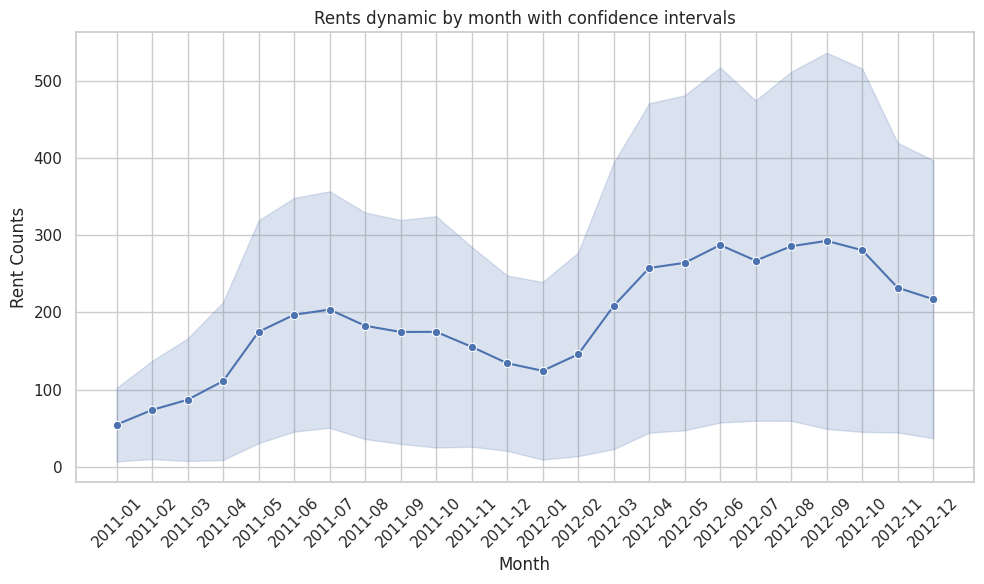

In [4]:
plt.figure(figsize=(10, 6))
sns.lineplot(df, x ='month_year', y ='count', errorbar='sd', marker='o')
plt.xlabel('Month')
plt.ylabel('Rent Counts')
plt.title('Rents dynamic by month with confidence intervals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Найбільша невизначеність даних є у проміжку місяців від 2012-04 і до 2012-12. Тут дані найбільше розкидані від середньго значення.

## Завдання 2: Порівняння стилів - Pandas vs Seaborn гістограма

**Завдання:**
Побудуйте гістограму розподілу температури двома способами - з Pandas та Seaborn - та порівняйте візуальний вигляд. Задайте однакову кількість бінів в цих візуалізаціях, відмінну від стандартної. В візуалізації Seaborn додайте параметр при побудові `kde=True`.

**Функція Seaborn: `sns.histplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

**Дайте відповідь на питання:**
1. Яка візуальна різниця між Pandas та Seaborn гістограмами?
2. Що за лінія додаткова на графіку в Seaborn? Як вона називається і як ви б її описали своїми словами?

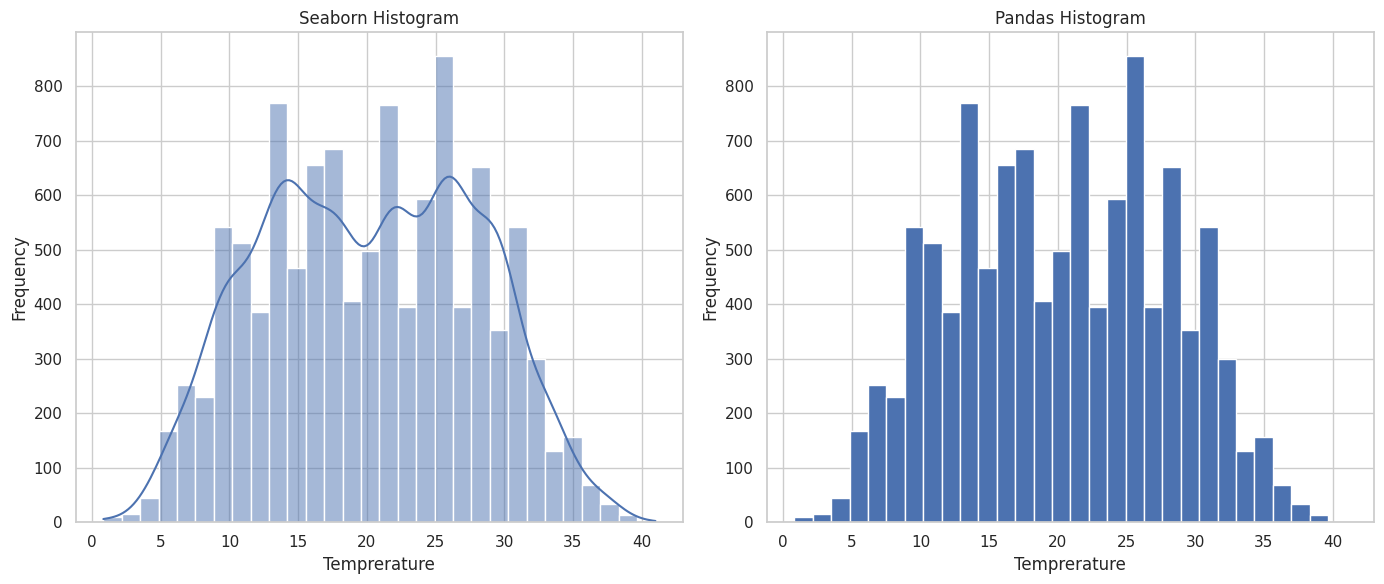

In [5]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['temp'], kde=True, bins=30)
plt.title('Seaborn Histogram')
plt.xlabel('Temprerature')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
df['temp'].plot.hist(bins=30)
plt.title('Pandas Histogram')
plt.xlabel('Temprerature')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Візуальна різниця, як видно із графіків, між pandas та seaborn помітна у контрасті кольорів, у pandas вони насиченіші, в seaborn гістограма має стандартні значення прозорості, тому сітку видно на наших бінах. Загалом більше і нічим не відрізняють.  

Лінія яку ми побудували kernel density estimation (kde) - ця лінія відображає біни гістограми але більш плавно, тобто вона також показує наш розподіл даних але у більш спрощеному, плавному виді.




## Завдання 3: Box Plot порівняння - Pandas vs Seaborn

**Завдання:**
Побудуйте box plot для кількості погодинних оренд велосипедів за погодними умовами з Pandas та Seaborn.

**Функція Seaborn: `sns.boxplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

Просунуте доповнення:
- підпишіть погодні умови їх інтерпретацією з опису даних в обох графіках

**Дайте відповідь на питання:**
- Яка візуальна різниця між Pandas та Seaborn бокс-плотами?

/tmp/ipython-input-1387484162.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(['Clear', 'Cloudy', 'Light Rain', 'Heavy Rain'])


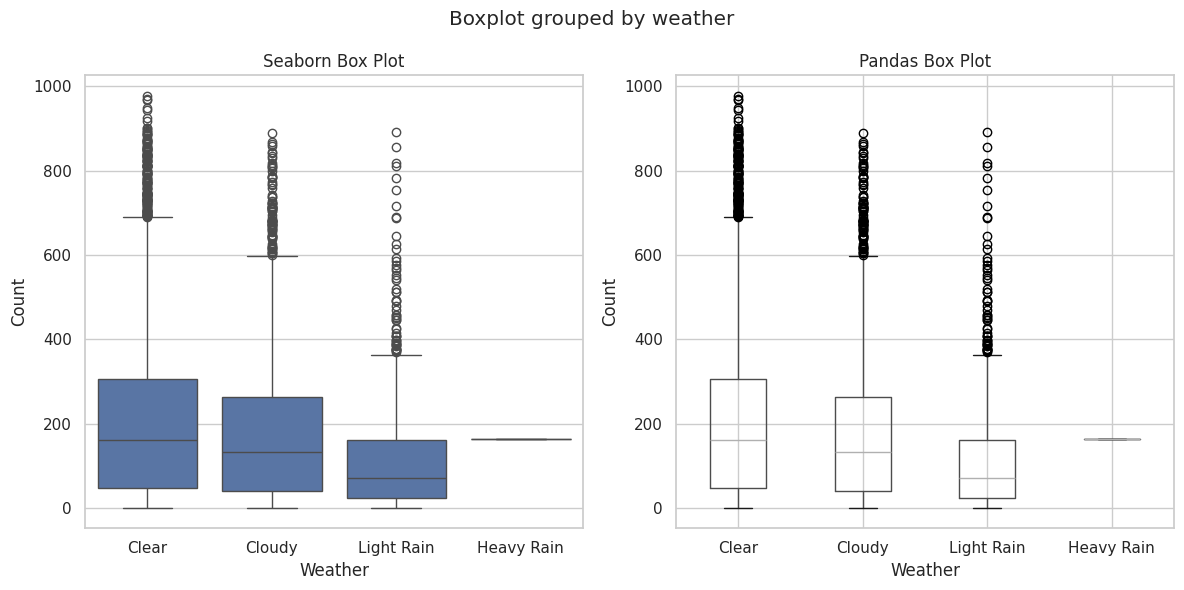

In [6]:
plt.subplots(1, 2, figsize=(12,6))

ax1 = plt.subplot(1, 2, 1)
sns.boxplot(df, x='weather', y='count')
plt.title('Seaborn Box Plot')
plt.xlabel('Weather')
plt.ylabel('Count')
ax1.set_xticklabels(['Clear', 'Cloudy', 'Light Rain', 'Heavy Rain'])

ax2 = plt.subplot(1, 2, 2)
df.boxplot(column='count', by='weather', ax=ax2)
plt.title('Pandas Box Plot')
plt.xlabel('Weather')
plt.ylabel('Count')
ax2.set_xticklabels(['Clear', 'Cloudy', 'Light Rain', 'Heavy Rain']) #пробував підписи додавати роблячи категоріальну колонку і порядком, але вибивало помилку, тому залишив той метод який працював



plt.tight_layout()
plt.show()

Явно помітно різницю між візуальним оформленням box plot у Pandas та Seaborn. Pandas додає повноцінну сітку, вертикальні та горизонтальні осі, графік більш щільний та контрастних, але бокси (Q1 - Q3) не заповенені кольором, що як на мене є мінусом.  
Seaborn показує трішки розтянуті бокси та менш контрастні кольори. Тут уже присутня заливка боксів кольором.

<!-- - -->
## Завдання 4: Heatmap кореляційної матриці

**Завдання:**
Створіть із Seaborn кореляційну матрицю з забарвленням heatmap (колір відповідає величині значення в клітинці) числових змінних в наших даних з анотаціями значень.

**Дайте відповіді на питання по графіку:**
1. Які змінні найсильніше корелюють з загальною кількістю оренди (count)?
2. Яка кореляція між temp та atemp? Чому?
3. Які змінні мають негативну кореляцію?


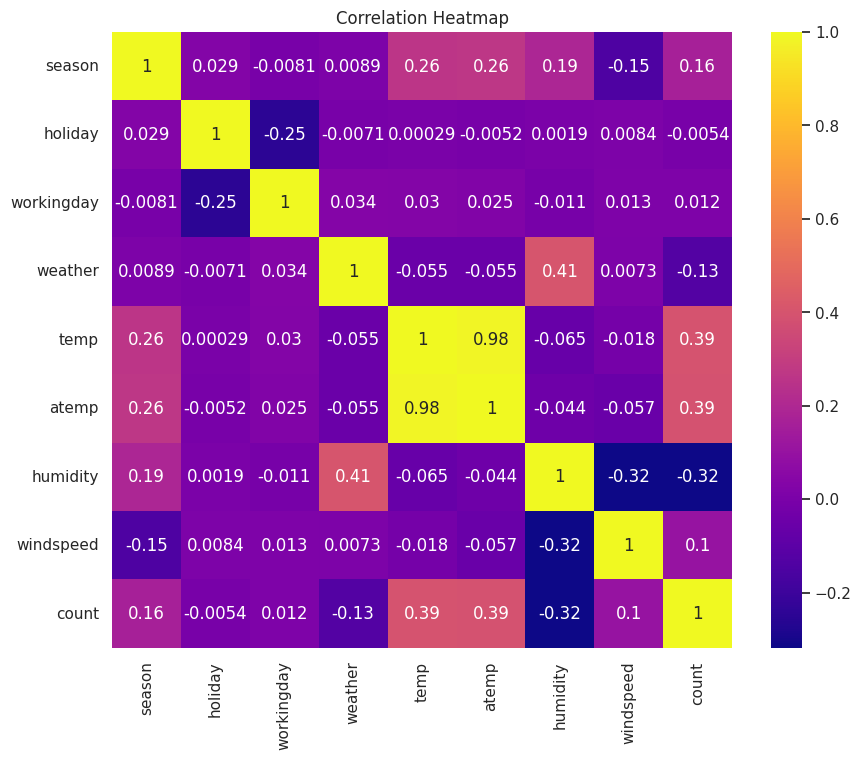

In [7]:
corr = df[['season', 'holiday', 'workingday','weather','temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='plasma', annot=True)
plt.title('Correlation Heatmap')
plt.show()

1. Як показано на нашій тепловій карті, найсильніша кореляція параметра "count" є із змінними температури та середньої температури. Хоча значення кореляції між цими змінними = 0,39, ми не можемо назвати цю залежність сильною, але загалом логісною, адже саме температура є основним показником що впливає на покупки оскільки зимою покупки менші а у більш теплі пори року більші.  
2. Кореляція між temp та atemp є дуже високою - 0,98. Це свідчить про пряму залежність цих показників між собою, і дійсно ми це можемо пояснити, бо в залежності від температури, значення середньої температури буде змінюватись аналогічно.  
3. Із наведених числовий значень нашого датафрейму багато значень кілька значень мають негативну кореляцію. Загалом це говорить про обернену залежність, тобто зі зменшенням значення одного параметру, інший збільшується і навпаки. Із найзрозумілішіх нам, тут можна відмітити негативну кореляцію -0,32 між показниками humidity та count, що можна інтерпритувати наступним чином, що при зменшенні вологості повітря, продажі зростають.

## Завдання 5: Violin Plot для глибокого аналізу розподілів

**Завдання:**
Створіть violin plot для аналізу розподілу оренди за кварталами.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показує "товщина" violin plot?
2. В якому кварталі найбільша варіабельність оренди?
3. Яка перевага violin plot над звичайним box plot?


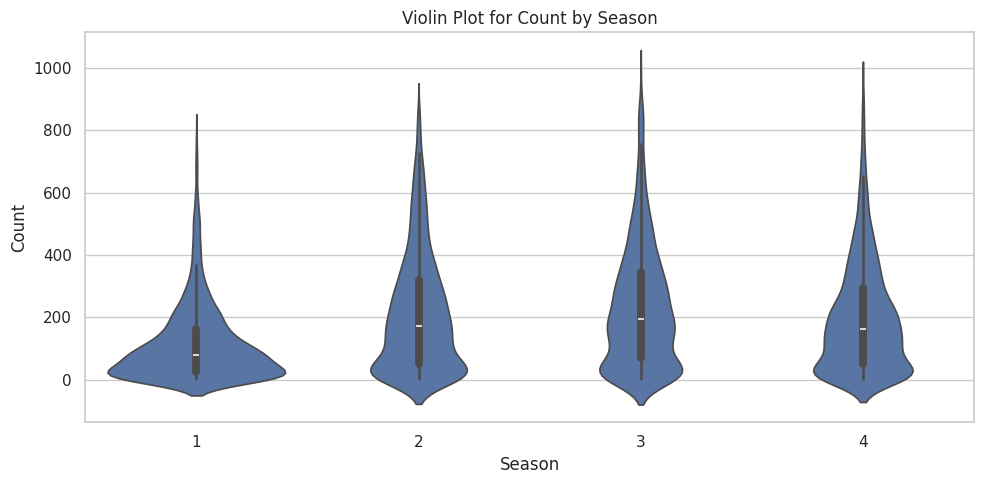

In [8]:
plt.figure(figsize=(10, 5))
sns.violinplot(data = df, x='season', y= 'count')

plt.title('Violin Plot for Count by Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

1.  "товщина" violin plot показує нам щільність даних, тобто це щось накшталт гістограми, чим товща вона, тим більше даних знаходиться в даному проміжку числових значень.  
2. Найбільша варіативність значень спостерігається на 3-му сезоні, адже тут максимальне видовження нашої "скрипки", що має відповідати літу.  
3. Violin plot має кілька переваг над box plot, адже може показувати моди(якщо наявні), форму нашого рорзподілу, тобто він для нас є більш інформативний.

## Завдання 6 : Pairplot для мультиваріативного аналізу

**Завдання:**
Створіть pairplot для аналізу взаємозв'язків між ключовими змінними `'temp', 'humidity', 'windspeed', 'count'` . В якості візуальної розбивки за категоріями (параметр `hue`) додайте season (квартал).

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Між якими змінними спостерігається найсильніший лінійний зв'язок?
2. Яка характеристика найбільше відрізняється між кварталами?

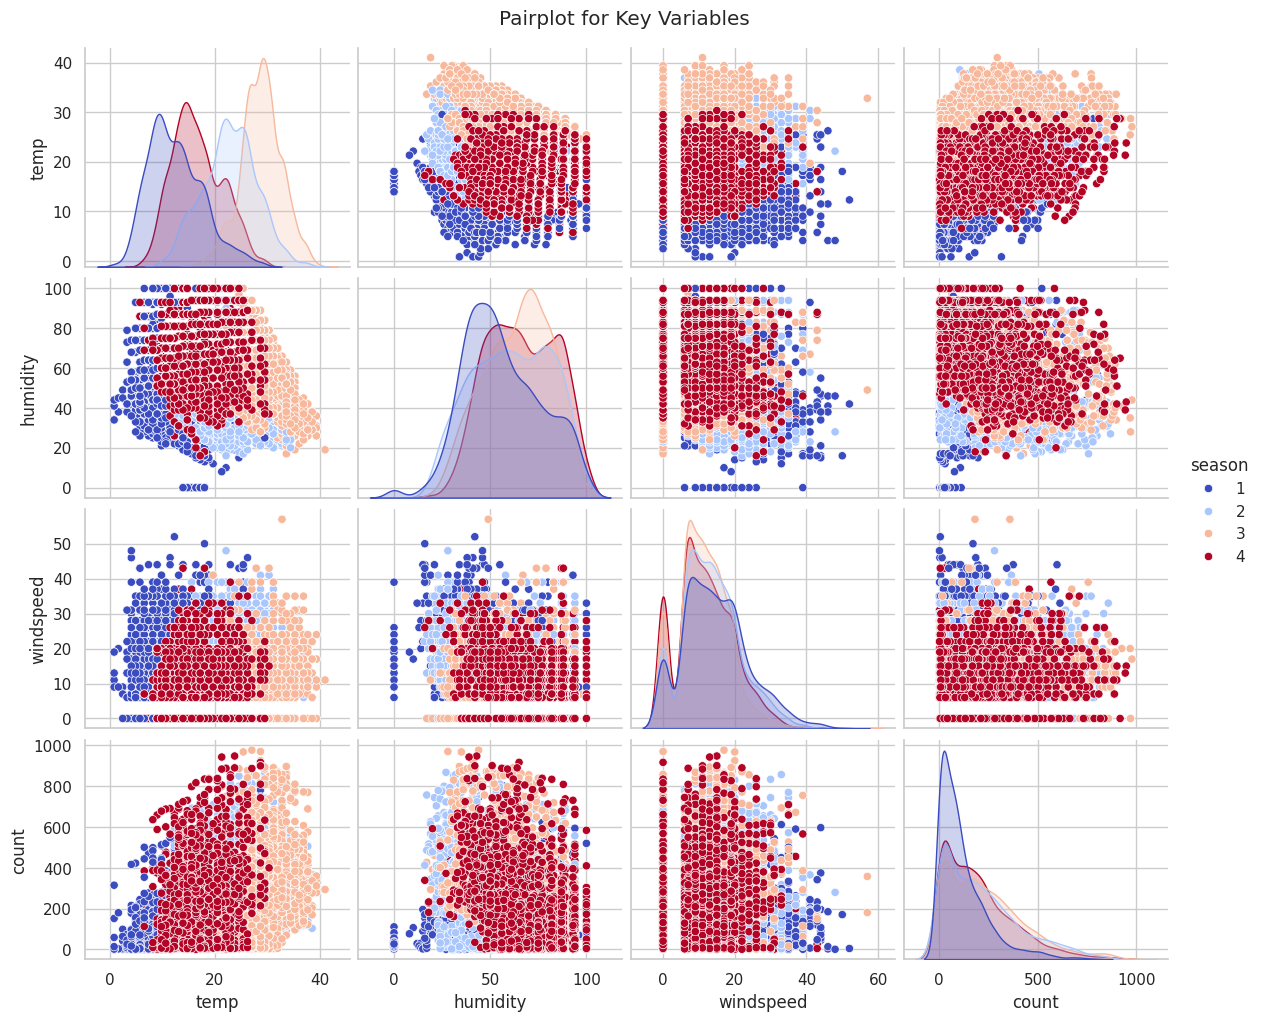

In [17]:
pair_df = df[['temp', 'humidity', 'windspeed', 'count', 'season']]
sns.pairplot(pair_df, height=2.5, aspect=1.2, hue='season', palette='coolwarm')
plt.suptitle('Pairplot for Key Variables', y = 1.02)
plt.show()

1. Найсильніший лінійний зв'язок спостерігається між змінними "count" та "temp", що і було підтверджено раніше.  
2. Найбільше поквартально можна спостерігати різницю в показниках саме температури, адже тут саме більше розкид даних між різними сезонами. Це є закономірно, адже це параметер який має сильну залежність між порою року.

## Завдання 7: Joint Plot для детального аналізу двох змінних

**Завдання:**
Проаналізуйте залежність між температурою та орендою за допомогою joint plot. В якості візуальної розбивки за категоріями (параметр `hue`) додайте `workingday`.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показують графіки по краях?
2. Чи є різниця у поведінці користувачів у робочий і неробочий день?

<Figure size 1200x600 with 0 Axes>

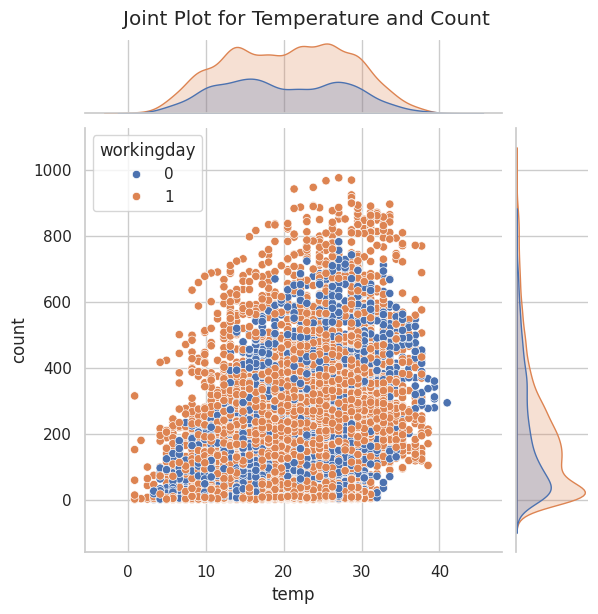

In [23]:
plt.figure(figsize=(12, 6))
sns.jointplot(data = df, x = 'temp', y = 'count', hue = 'workingday')
plt.suptitle('Joint Plot for Temperature and Count', y = 1.02)
plt.show()

1. По краям графік поразує наш розподіл (гістограму) даних, але не бінами а у вигляді kernel density estimation (kde).  
2. Помаранчевий колір відповідає за робочий день що явно має набагато більше кількості оренд а ніж у вихідні дні (синій колір), це може бути пов'язане із тим що робочих днів значно більше. Також, можна відмітити, що загальні оренди відносно збільшення температури збільшуються для всіх днів.